In [41]:
import cv2
import numpy as np
from skimage.morphology import *
import matplotlib.pyplot as plt
import tensorflow as tf
from segmentation_models.losses import *
from tensorflow.keras.losses import BinaryCrossentropy

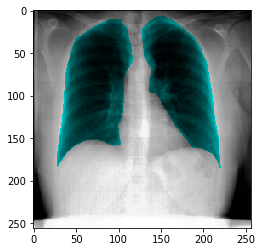

In [6]:
mask = cv2.imread('../Data/Masks/NEW410198.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)
mask = mask[:,:,np.newaxis] / 255.
image = cv2.imread('../Data/Images/NEW410198.png') / 255.


to_show = image.copy()
to_show[:, :, 0] *= (1 - mask[:,:,0])
plt.imshow(to_show)
plt.show()

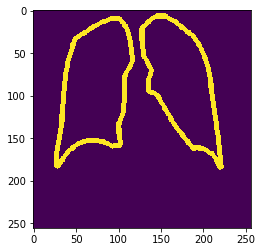

In [7]:
elem = disk(3)
ignore = np.zeros(mask.shape, dtype=np.float)
ignore[:,:,0] += binary_dilation(mask[:,:,0],selem=elem) - mask[:,:,0]
ignore[:,:,0] += mask[:,:,0] - binary_erosion(mask[:,:,0],selem=elem)
plt.imshow(ignore[:,:,0])

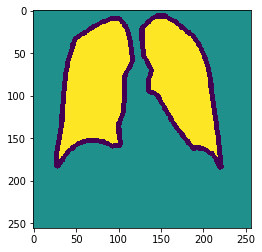

In [8]:
new_mask = mask.copy()
new_mask[ignore == 1] = -1
plt.imshow((new_mask[:,:,0] + 1) / 2.)

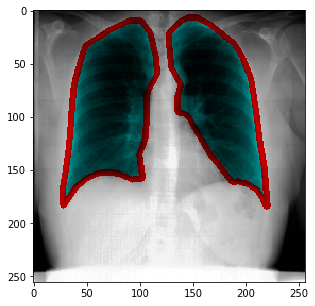

In [14]:
to_show = image.copy()
to_show[:, :, 0] *= (1 - (new_mask[:,:,0] == 1))
to_show[:, :, 1] = to_show[:, :, 2] = to_show[:,:,1] * (1 - (new_mask[:,:,0] == -1))

plt.figure(figsize=[5,5])
plt.imshow(to_show)
plt.show()

## Loss

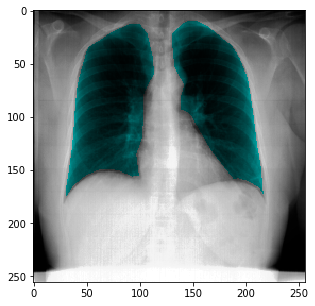

In [60]:
gt = new_mask
pred = gt.copy()
pred[pred < 0] = 0.5#np.random.rand(np.sum(pred < 0))

to_show = image.copy()
to_show[:, :, 0] *= (1 - (pred[:,:,0]))
plt.figure(figsize=[5,5])
plt.imshow(to_show)
plt.show()

In [77]:
def a(i):
    print(i)
    
def dec(f,txt):
    setattr(f,'__before_dec', f.__call__)
    def wrapper(self, *args):
        print(self, *args)
        print(txt)
        return self.__before_dec(*args)
    f.__call__ = wrapper
    return f
        
a = dec(a,"hello")
a(1)

1


In [64]:
tf.keras.losses.get('binary_crossentropy')

<function tensorflow.python.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

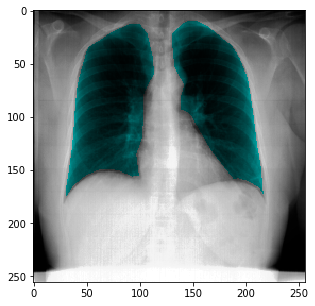

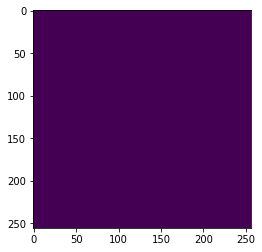

0.0


0.0

In [63]:
loss =  JaccardLoss()
t_pred = pred.copy()
t_pred[t_pred == 0.5] = np.random.rand(np.sum(t_pred == 0.5))


to_show = image.copy()
to_show[:, :, 0] *= (1 - (t_pred[:,:,0]))
plt.figure(figsize=[5,5])
plt.imshow(to_show)
plt.show()

new_gt = gt.copy()
new_gt[gt==-1] = t_pred[new_gt==-1]
plt.imshow(np.abs(new_gt - t_pred)[:,:,0])
plt.show()
print(np.sum(np.abs(new_gt - t_pred)))

loss(new_gt,t_pred).numpy()